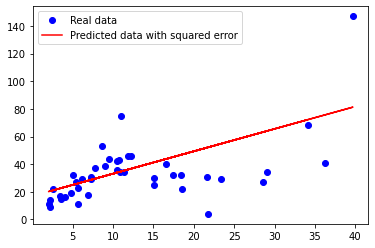

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import tensorflow as tf
tf=tf.compat.v1
tf.disable_eager_execution()

# Input data file
DATA_FILE = "./slr05.xls"

# Read in data (DO NOT REVISE)
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

X=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(0.0)
b=tf.Variable(0.0)

y_pred=w*X+b

loss=tf.square(y-y_pred)

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as s:
    s.run([w.initializer,b.initializer])
    for i in range(1000):
        for xx,yy in data:
            s.run(optimizer,feed_dict={X:xx,y:yy})
    w_out, b_out = s.run([w, b])
    tf.summary.FileWriter('./graph1',s.graph)
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
# plt.plot(data[:,0], data[:,0] * (-5.883589) + 85.124306, 'g', label='Predicted data with Huber loss')
plt.legend()
plt.show()
    #%%
# Step 3: create variables: weights_1, weights_2, bias. All are initialized to 0
w = tf.Variable(0.0, name="weights_1")
u = tf.Variable(0.0, name="weights_2")
b = tf.Variable(0.0, name="bias")
# Step 4: predict Y (number of theft) from the number of fire
Y_predicted = X * X * w + X * u + b
# Step 5: Profit!